<a href="https://colab.research.google.com/github/yanamushka/ML-course/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [34]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv('medical-charges.csv')

In [7]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для прогнозування колонки charges можоиві наступні підходи:
* Провести кореляційних аналіз числових змінних charges та age, bmi, children
* Проаналізувати категоріальні змінні які charges мали чоловіки та жінки, клієнти з різних регіонів, курці
* Проаналізувати які charges мали жінки і чоловіки в залежності від того чи мають вони дітей
* Проаналізувати charges курців з різною масою тіла, курців різного віку

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [8]:
fig_age = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color = 'sex',
                   color_discrete_sequence = ['orange','blue'],
                   title='Medical Charges by Sex')
fig_age.update_layout(bargap=0.1)
fig_age.show()

* Медіана медичних зборів для чоловіків та жінок майже однакова близько $9400

* Існує значна різниця між верхнею межею медичних оплат для чоловіків та жінок. Більшість жінок сплачують до \$29000, в той час як для чоловіків верхня межа наближається до \$40 000. Можливо варто додатково дослідити частину чоловіків які сплачують щорічні внески  більше медіанного значення та виявити додаткові фактори, які вплинули на такий розподіл.

In [9]:
fig_region = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color = 'region',
                   color_discrete_sequence = ['brown', 'coral', 'cadetblue','cornflowerblue'],
                   title='Medical Charges by Region')
fig_region.update_layout(bargap=0.1)
fig_region.show()

* Бачимо, що для більшості регіонів медіанне значення річних медичних платежів знаходиться близько \$9000 крім північного сходу, де медіана більша \$10 000.
* Річні медичні платежі клієнтів з південного сходу  мають найбільший діапазон з верхнею межею близько\$ 42 000. Це може бути пов'язано з кліматичними та природніми умовами регіону, та підвищеною ймовірністю звернень клієнтів з захворюваннями, які зазвичай трапляються у тропіках та більш спекотному, вологому кліматі

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [10]:
px.histogram(df, x = 'region', color = 'smoker', title = 'region')

Бачимо, що серед жителів південного сходу значно більше курців у порівняннні з іншими регіонами.

In [11]:
px.histogram(df, x = 'children', color = 'smoker', title = 'Children')

Серед клієнтів які мають менше 4-х дітей відсоток клієнтів, які повідомили, що є курцями складає близько 20%. Цей показник значно менший для клієнтів, які мають 4 дітей, а також серед батьків 5 дітей немає курців.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [16]:
sorted = df.sort_values(by='children')

In [17]:
px.violin(sorted, x = 'charges', color = 'children', title = 'Children vs Charges')


* Найменше медіанне значення страхових платежів має категорія клієнтів, що мають 1 дитину, а найбільше ті, що мають 4-ро дітей.
* Бачимо, що  у групі клієнтів, які мають 5 дітей концентрація значень витрат більша у проміжку від \$4000 до \$10 000. А максимальне значення становить \$22 000, що в 2-3 рази  менше від  інших груп
* Група клієнтів, що не мають дітей має дві групи концентрації значень, перша в межах \$1500 - \$5000, а друга від \$10 000 - \$15 000
* Загалом можемо сказати, що різниця між страховими оплатами клієнтів з різною кількістю дітей є незначною, вирізняються лише клієнти, що мають 5 дітей, але це також група, що  не мала курців, тому потрібно детільніше дослідити вплив цих факторів на значення оплат.


**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [23]:
no_smoker_df = df[df.smoker == 'no']

In [19]:
def estimate_charges(age, w, b):
    return w * age + b

In [28]:
def try_parameters(w, b):
    ages = no_smoker_df.age
    target = no_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

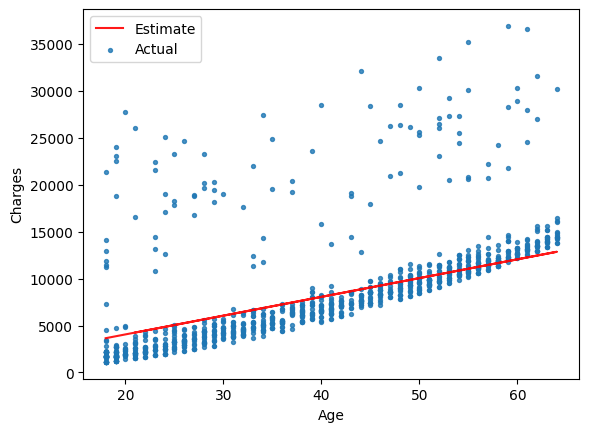

In [29]:
try1 = try_parameters( 200, 50)

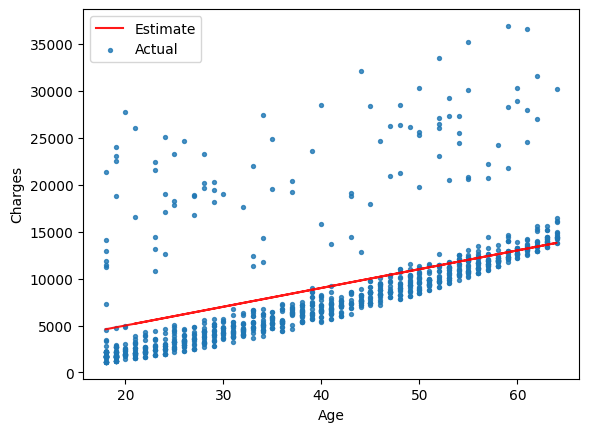

In [30]:
try_2 = try_parameters( 200, 1000)

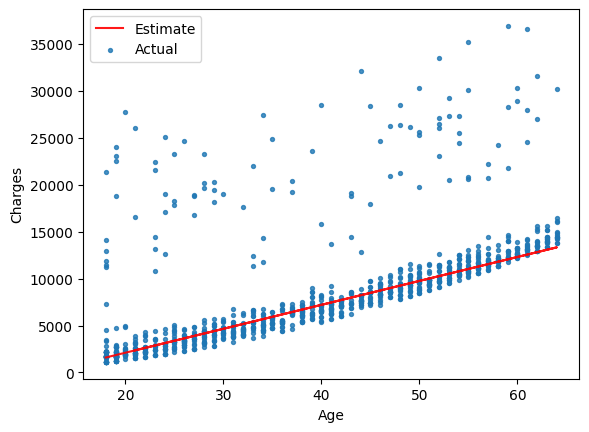

In [31]:
try_3 = try_parameters(255, -3000)

Графіки 1 та 2 добре демонструють як показник b  вливає на вертикальне положення прямої. В усіх випадках кут нахилу моделі не повністю співпадає з  кутом  сформованим з точок наявних даних оплат страхування. Методом підбору доволі складно підібрати такі параметри моделі, щоб точно описали лінію, яка сформувалась з даних. Візуально складно оцінити щільність розташування даних, розмах значень для кожної точки віку і де саме має проходити пряма, щоб описати максимальну кількість значень.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [39]:
import numpy as np

In [32]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [37]:
targets = df['charges']
predicted = estimate_charges(no_smoker_df.age, 200, 50 )

In [40]:
rmse(targets, predicted)

4784.595754855184

In [48]:
predicted2 = estimate_charges(no_smoker_df.age, 200, 1000 )

In [46]:
rmse(targets, predicted2)

4971.5967339993995

In [51]:
predicted3 = estimate_charges(no_smoker_df.age, 244, -3000 )

In [52]:
rmse(targets, predicted3)

5017.363675134951

* Найменше значення функції втрат 4784, його вдалось досягти для моделі у = 200х + 50
Враховуючи, що більшість клієнтів мають сплачувати до \$ 10 000 показник втрат у розмірі 4784 є дуже великим, бо означає що кожен елемент у прогнозі відрізняється на \$4784


* Можна створити ітератор, який буде проходитись по двом наборам
даних w та b, обчислювати значееня RMSE та порівнювати його з мінімальним (перше мінімальне значення може бути 5000), якщо нове значення менше за попереднє, то це значення стає мінімальним значенням. Такий підхід може мати складнощі з вибором діапазону значень для коефіцієнтів кореляції, тому можна виконати його в декілька етапів. Спочатку обрати за крок тисячі, потім сотні і тд.